In [5]:
import re
import json
import tarfile
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import seaborn as sns
from imdb import IMDb
from scipy import stats
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns
import nltk
from wordcloud import WordCloud
nltk.download('vader_lexicon')
from sklearn.preprocessing import MinMaxScaler
from nltk.tokenize import word_tokenize

# Download NLTK resources (if not already downloaded)
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\koami\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\koami\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\koami\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

***************************************************************************************************************
### Research question Q5 : How does the critical reception and recognition of movies with explicit socio-political content compare to those focused on entertainment or aesthetics?
***************************************************************************************************************

Combining quantitative analysis of movie ratings, we aim to uncover patterns in critical reception, exploring whether movies with socio-political underpinnings receive different levels of critical acclaim and recognition compared to those with a more entertainment-oriented or aesthetic focus.

In [6]:
df = pd.read_csv('df_final.csv')

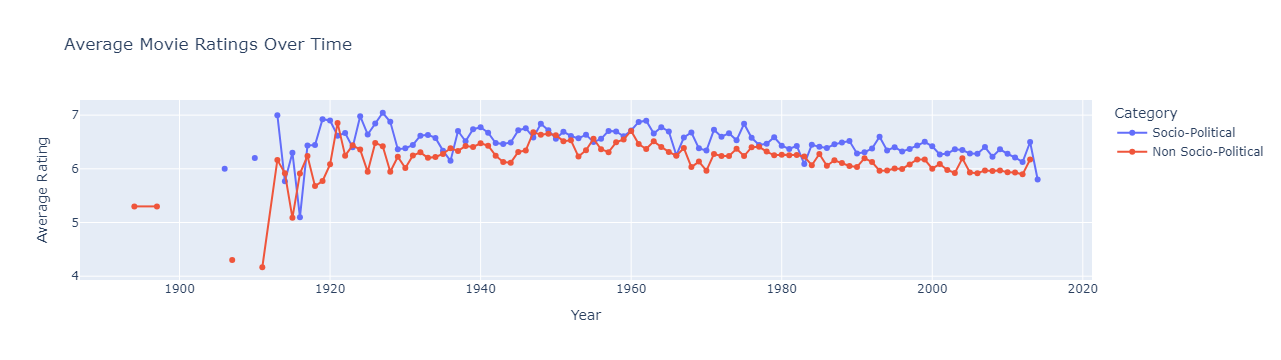

In [11]:
#*****************************************************************************************************************
#Trend Analysis Over Time: Analyze how the critical reception of movies in the Socio-political and Non Socio-Political categories has changed over time.
#*****************************************************************************************************************

# Assuming you have your DataFrame 'df' and other necessary setup

# Group by ReleaseYear and Category, then calculate the mean rating for each group
mean_ratings_over_time = df.groupby(['MovieReleaseDate', 'Category'])['averageRating'].mean().unstack().reset_index()

# Plotting with Plotly Graph Objects
trace_socio_political = go.Scatter(x=mean_ratings_over_time['MovieReleaseDate'], y=mean_ratings_over_time['Socio-Political'],
                                   mode='lines+markers', name='Socio-Political')

trace_non_socio_political = go.Scatter(x=mean_ratings_over_time['MovieReleaseDate'], y=mean_ratings_over_time['Non Socio-Political'],
                                       mode='lines+markers', name='Non Socio-Political')

data = [trace_socio_political, trace_non_socio_political]

layout = go.Layout(
    title='Average Movie Ratings Over Time',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Average Rating'),
    legend=dict(title='Category'),
)

fig = go.Figure(data=data, layout=layout)

fig_json = fig.to_json()
with open('figure_state.json', 'w') as json_file:
    json_file.write(fig_json)
# Show the plot
fig.show()


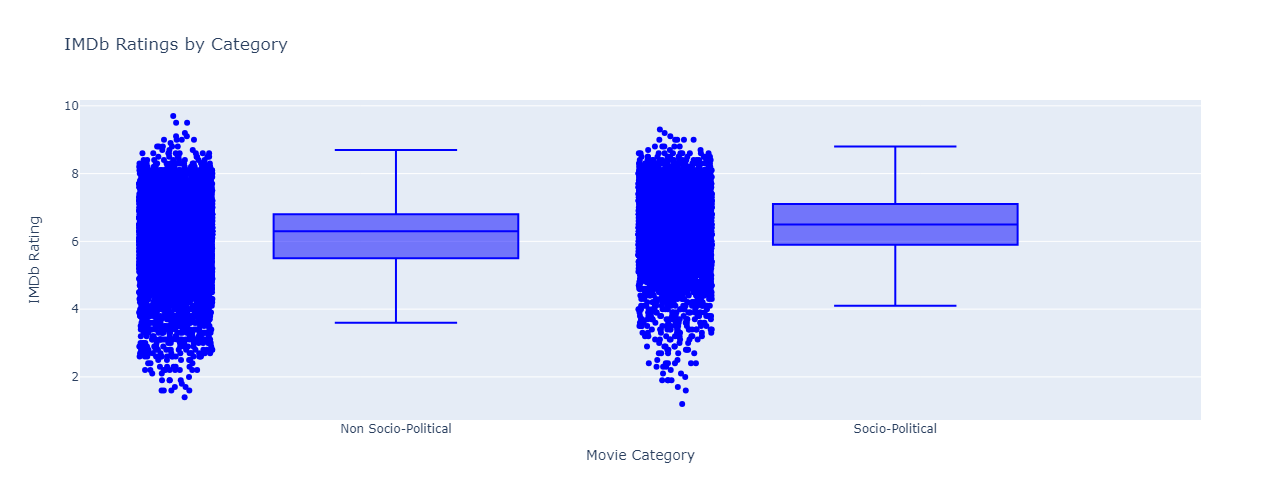

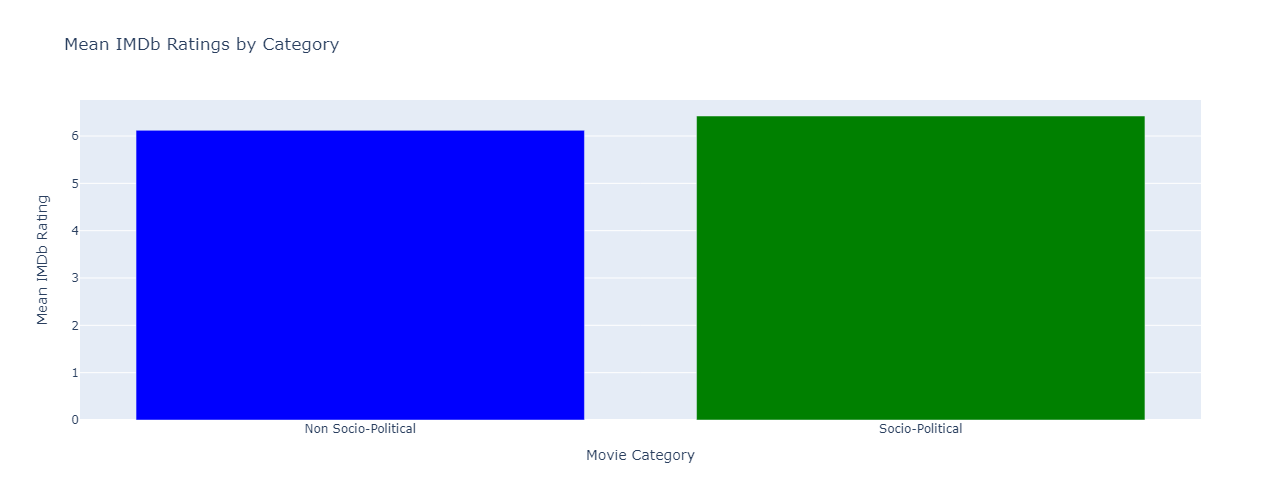

T-Statistic: 17.59321774338521
P-Value: 1.4422005814349149e-68
The difference in IMDb ratings is statistically significant.
Mean IMDb Rating (Socio-Political): 6.422894898586355
Mean IMDb Rating (Non Socio-Political): 6.12013740819711
Standard Deviation IMDb Rating (Socio-Political): 1.0103664816536573
Standard Deviation IMDb Rating (Non Socio-Political): 1.0843523423874841


In [15]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
from scipy import stats

# Assuming you have your DataFrame 'df' and other necessary setup

# Separate movies into two categories
socio_political_movies = df[df['Category'] == 'Socio-Political']
non_socio_political_movies = df[df['Category'] == 'Non Socio-Political']

# Create box plots to visualize IMDb ratings for each category
box_trace = go.Box(
    x=df['Category'],
    y=df['averageRating'],
    name='IMDb Ratings',
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8,
    marker=dict(color='blue'),
)

box_layout = go.Layout(
    title='IMDb Ratings by Category',
    xaxis=dict(title='Movie Category'),
    yaxis=dict(title='IMDb Rating'),
    width=800,
    height=500,
)

box_fig = go.Figure(data=[box_trace], layout=box_layout)

# Group the data by category and calculate the mean IMDb rating for each category
category_means = df.groupby('Category')['averageRating'].mean().reset_index()

# Create a bar chart to visualize mean IMDb ratings by category
bar_trace = go.Bar(
    x=category_means['Category'],
    y=category_means['averageRating'],
    marker=dict(color=['blue', 'green']),
)

bar_layout = go.Layout(
    title='Mean IMDb Ratings by Category',
    xaxis=dict(title='Movie Category'),
    yaxis=dict(title='Mean IMDb Rating'),
    width=600,
    height=500,
)

bar_fig = go.Figure(data=[bar_trace], layout=bar_layout)

bar_fig = go.Figure(data=[bar_trace], layout=bar_layout)

# Convert the bar chart figure to JSON
bar_fig_json = bar_fig.to_json()
with open('bar_chart_figure.json', 'w') as json_file:
    json_file.write(bar_fig_json)
    
# Display the box plot and bar chart
box_fig.show()
bar_fig.show()


# Perform a t-test to compare IMDb ratings
t_statistic, p_value = stats.ttest_ind(socio_political_movies['averageRating'], non_socio_political_movies['averageRating'], equal_var=False)

# Print the results of the t-test
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Determine if the difference is statistically significant
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print('The difference in IMDb ratings is statistically significant.')
else:
    print('There is no statistically significant difference in IMDb ratings.')

# Print the means and standard deviations for each category
mean_socio_political = socio_political_movies['averageRating'].mean()
mean_non_socio_political = non_socio_political_movies['averageRating'].mean()
std_socio_political = socio_political_movies['averageRating'].std()
std_non_socio_political = non_socio_political_movies['averageRating'].std()

print(f'Mean IMDb Rating (Socio-Political): {mean_socio_political}')
print(f'Mean IMDb Rating (Non Socio-Political): {mean_non_socio_political}')
print(f'Standard Deviation IMDb Rating (Socio-Political): {std_socio_political}')
print(f'Standard Deviation IMDb Rating (Non Socio-Political): {std_non_socio_political}')


In the dynamic landscape of the film industry, the exploration of how explicit socio-political content in movies compares to those emphasizing entertainment or aesthetics has become an increasingly pertinent area of inquiry. In this part, we want to unravel the nuanced interplay between critical reception and recognition in movies, aiming to discern whether movies addressing socio-political themes resonate differently with audiences compared to those designed that are non socio-political.

The research question at the core of this investigation is: "How does the critical reception and recognition of movies with explicit socio-political content compare to those focused on entertainment or aesthetics?" To answer this question, a comprehensive analysis was undertaken, considering a range of factors, from average ratings to standard deviations, with the ultimate goal of uncovering patterns and trends that illuminate the distinct nature of these two categories.

The statistical results yielded a compelling T-Statistic of 17.59 and a P-Value of 1.44e-68, indicating a statistically significant difference in IMDb ratings between movies with explicit socio-political content and those emphasizing entertainment or aesthetics. This discovery opens a gateway to a deeper understanding of audience preferences, critical evaluations, and the potential impact of socio-political narratives on the movies landscape.